El objetivo de esta fase es determinar si existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados, y si es así, cuál es la magnitud de esa relación. Partiremos de la siguiente hipótesis, "Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. Se sospecha que los empleados con niveles de satisfacción más bajos tienen una mayor probabilidad de dejar la empresa". Para ello deberéis crear una columna nueva en base al nivel de satisfacción en el trabajo para crear dos grupos, las condiciones para crear los grupos son:
Grupo A (Control): Empleados con un nivel de satisfacción en el trabajo igual o superior a 3 en una escala de 1 a 5.
Grupo B (Variante): Empleados con un nivel de satisfacción en el trabajo inferior a 3 en la misma escala.
La métrica principal que debes usar es la tasa de rotación de empleados (Attrition) en cada grupo. Recordemos que, en esta columna, "No" indica que el empleado no ha dejado la empresa (sin rotación), mientras que "Yes" indica que el empleado ha dejado la empresa (con rotación).
Por lo tanto, los pasos que deberás seguir en esta fase son:
Divide a los empleados en los grupos A y B según los criterios establecidos.
Calcula la tasa de rotación (porcentaje de empleados que dejaron la empresa) en cada grupo.
Realiza un análisis estadístico para determinar si hay una diferencia significativa en la tasa de rotación entre los grupos A y B.
Analiza los resultados.
Calcular la magnitud de esta relación utilizando estadísticas como la diferencia de medias por ejemplo.

In [1]:

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest,chi2_contingency,ttest_ind

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("hr_limpio.csv",index_col=0)

In [3]:
df.head()

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,yearbirth,remotework,dailyrate,totalworkingyears
0,51,no,unknown,unknown,6.0,university,unknown,162.0,1,male,51,3,expert,research director,3,unknown,19537.0,6462,7,no,13,3.0,3,0,5,3.0,20,15,15,1972,yes,684.0,24.0
1,52,no,unknown,unknown,1.0,master degree,life sciences,259.0,3,male,65,2,expert,manager,3,unknown,19999.0,5678,0,unknown,14,3.0,1,1,5,3.0,33,11,9,1971,yes,699.0,34.0
2,42,no,travel_rarely,research & development,4.0,college,technical degree,319.0,3,male,58,3,expert,manager,4,married,19232.0,4933,1,no,11,3.0,4,0,3,3.0,22,11,15,1981,yes,532.0,22.0
3,47,no,travel_rarely,unknown,2.0,master degree,medical,unknown,1,female,82,3,advanced,research director,3,married,17169.0,26703,3,unknown,19,3.0,2,2,2,3.0,20,5,6,1976,no,359.0,11.8
4,46,no,unknown,unknown,3.0,university,technical degree,unknown,1,female,45,4,advanced,sales executive,1,divorced,unknown,7739,2,no,12,3.0,4,1,5,3.0,19,2,8,1977,no,1319.0,9.8


In [ ]:
def 

In [97]:
def categorizar_grupos(numero):
    if numero >= 3:
        return "grupo A"
    else:
        return "grupo B"
    

df["grupo_satisfaccion"]= df["jobsatisfaction"].apply(categorizar_grupos)


Hipotesis nula[HO]
No hay cambios significativos entre los dos grupos

Hupotesis alternanova [H1]
Hay cambios significativos entre lso dos grupos

—————

Creamos un DataFrame aislando las columnas que nos interesan y hacemos los tests sobre ellas.

Rotación si: empleados satisfechos cuya valoración mayor o igual a 3. Empleados Insatisfechos cuya valoración inferior a 3. 
Rotación no: empleados satisfechos cuya valoración mayor o igual a 3. Empleados Insatisfechos cuya valoración inferior a 3.
Ahora vamos a estudiar si las diferencias son significativas porque visualmente no parece que sean muy grandes.

In [98]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'department', 'distancefromhome',
       'education', 'educationfield', 'employeenumber',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'stockoptionlevel', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearssincelastpromotion', 'yearswithcurrmanager',
       'yearbirth', 'remotework', 'dailyrate', 'totalworkingyears',
       'grupo_satisfaccion'],
      dtype='object')

In [99]:
def categorizar_grupos(numero):
    if numero >= 3:
        return "grupo A"
    else:
        return "grupo B"
    

df["job_satisfaction_ab"]= df["jobsatisfaction"].apply(categorizar_grupos)
df["environment_satisfaction_ab"]=df["environmentsatisfaction"].apply(categorizar_grupos)
df["relationship_satisfaction_ab"]=df["relationshipsatisfaction"].apply(categorizar_grupos)
df["job_involvement_ab"]=df["jobinvolvement"].apply(categorizar_grupos)
df["work_lifebalance_ab"]=df["worklifebalance"].apply(categorizar_grupos)


In [100]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'department', 'distancefromhome',
       'education', 'educationfield', 'employeenumber',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'stockoptionlevel', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearssincelastpromotion', 'yearswithcurrmanager',
       'yearbirth', 'remotework', 'dailyrate', 'totalworkingyears',
       'grupo_satisfaccion', 'job_satisfaction_ab',
       'environment_satisfaction_ab', 'relationship_satisfaction_ab',
       'job_involvement_ab', 'work_lifebalance_ab'],
      dtype='object')

In [101]:
columnas_ab=['job_satisfaction_ab',
       'environment_satisfaction_ab', 'relationship_satisfaction_ab',
       'job_involvement_ab', 'work_lifebalance_ab']

In [108]:
def ab_testing(columnas):
    
    df_grupoA = df[df[columnas]== "grupo A"]
    tasa_grupoA_rotacion=np.round(df_grupoA[df_grupoA["attrition"]== "yes"].shape[0]/df_grupoA.shape[0],2)
    print(tasa_grupoA_rotacion)

    df_grupoB = df[df[columnas]== "grupo B"]
    tasa_grupoB_rotacion=np.round(df_grupoB[df_grupoB["attrition"]== "yes"].shape[0]/df_grupoB.shape[0],2)
    print(tasa_grupoB_rotacion)
     
    # Crear un DataFrame
    data_p_test = {
    'Grupo': ["Empleados Satisfechos", "Empleados Insatisfechos"],
    'Rotacion_si': [df_grupoA[df_grupoA["attrition"]== "yes"].shape[0]/df_grupoA.shape[0],df_grupoB[df_grupoB["attrition"]== "yes"].shape[0]/df_grupoB.shape[0]],
    'Rotacion_no': [df_grupoA[df_grupoA["attrition"]== "no"].shape[0]/df_grupoA.shape[0],df_grupoB[df_grupoB["attrition"]== "no"].shape[0]/df_grupoB.shape[0]]}

    df_p_test = pd.DataFrame(data_p_test)
    
    # hacemos un análisis visual previo
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

    sns.barplot(x="Grupo", y="Rotacion_si", data=df_p_test,  palette = "flare",ax = axes[0])
    sns.barplot(x="Grupo", y="Rotacion_no", data=df_p_test,  palette = "flare", ax = axes[1])

    axes[0].set_title(columnas)
    axes[1].set_title(columnas)
        
    # Crear una tabla de contingencia
    contingency_table = pd.crosstab(df_p_test['Grupo'], df_p_test['Rotacion_si'])

# Realizar la prueba de proporciones
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Imprimir el resultado de la prueba
    alpha = 0.05
    if p_value < alpha:
        print(f"Hay una diferencia significativa entre {columnas} y la rotación")
        print("""
            Los resultados sugieren que existe evidencia estadística para afirmar que los datos guardan relación. 
            """)
        print("\n ---------- \n")
    else:
        print(f"No hay una diferencia significativa entre {columnas} y la rotación.")
        print("""Los resultados sugieren que no existe evidencia estadística para afirmar que los datos guardan relación""")
        print("\n ---------- \n")   

0.14
0.19
No hay una diferencia significativa entre job_satisfaction_ab y la rotación.
Los resultados sugieren que no existe evidencia estadística para afirmar que los datos guardan relación

 ---------- 

0.13
0.2
No hay una diferencia significativa entre environment_satisfaction_ab y la rotación.
Los resultados sugieren que no existe evidencia estadística para afirmar que los datos guardan relación

 ---------- 

0.15
0.17
No hay una diferencia significativa entre relationship_satisfaction_ab y la rotación.
Los resultados sugieren que no existe evidencia estadística para afirmar que los datos guardan relación

 ---------- 

0.13
0.22
No hay una diferencia significativa entre job_involvement_ab y la rotación.
Los resultados sugieren que no existe evidencia estadística para afirmar que los datos guardan relación

 ---------- 

0.15
0.19
No hay una diferencia significativa entre work_lifebalance_ab y la rotación.
Los resultados sugieren que no existe evidencia estadística para afirmar q

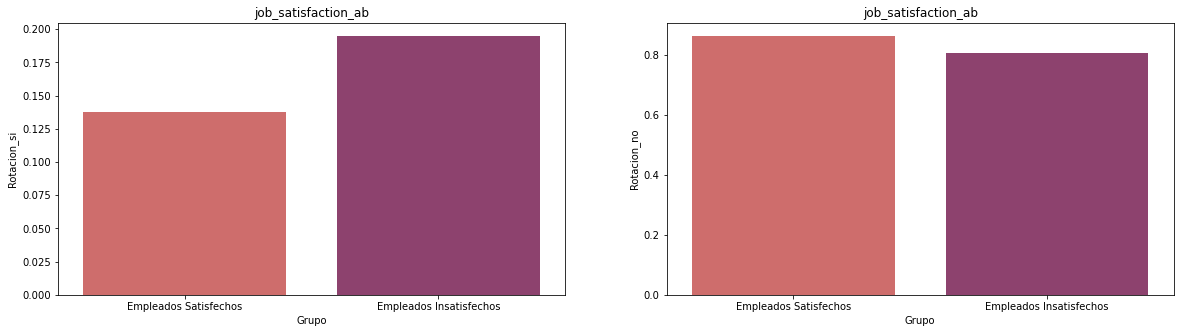

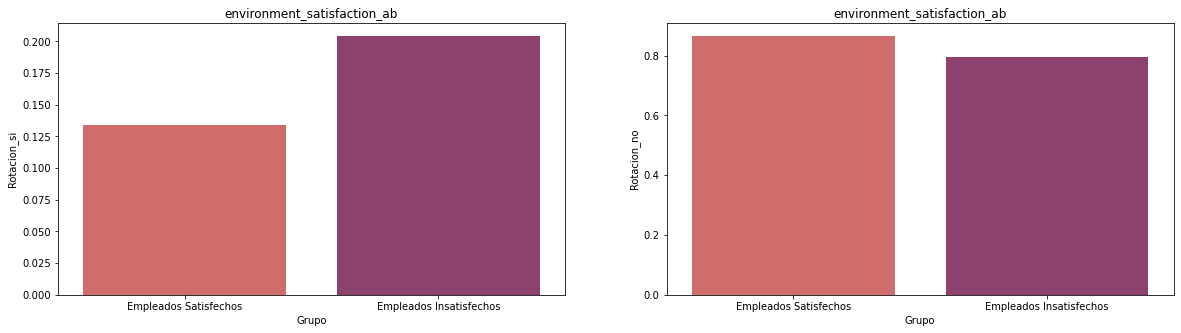

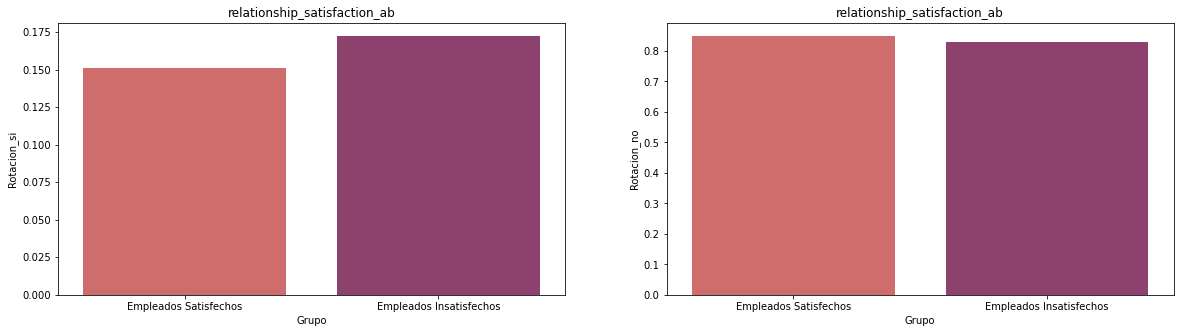

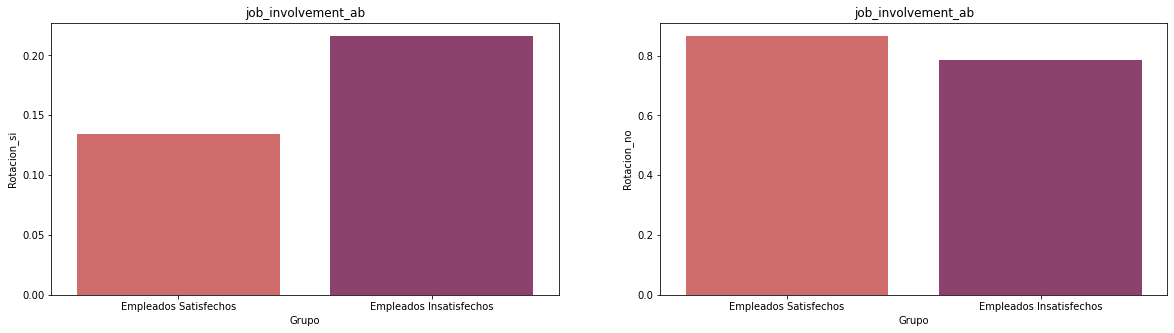

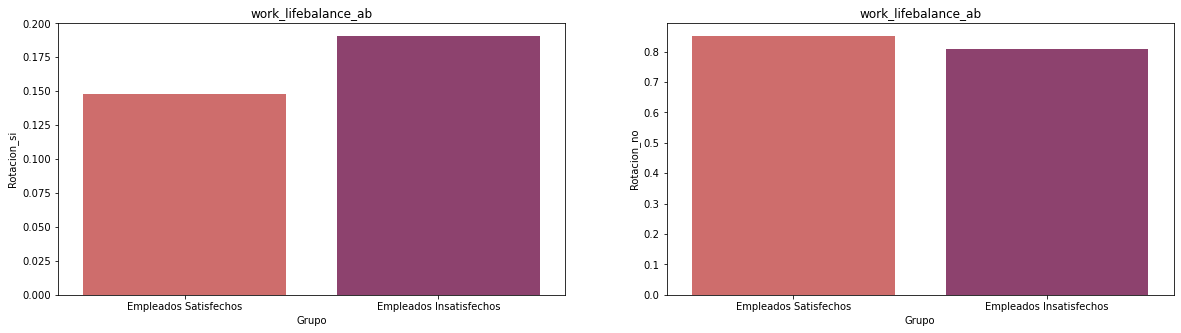

In [109]:
for columna in columnas_ab:
    ab_testing(columna)